# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name:Priyanka Wakte

ID:1001920878

Team Mate name :Sai Madhu Bhavana. Alla

ID:1001949797

## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is required for this assignment. Still you need to comment your code. (-10 for no comments in the code.)
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is given as 3 files . 




You need to submit this .ipynb file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

# Import required Python packages here
# Seaborn,numpy,pandas,sklearn,matplotlib only
-20 points for the use of libraries other than the above mentioned

In [2]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

In [5]:
#Read the csv data into dataframe and treating '?' as null values
df_dt = pd.read_csv('C:/Users/priya/OneDrive - University of Texas at Arlington/Documents/Data Mining/assignment4-1/clusteringdata.csv',na_values = "?")

#Dropping null values
df_dt= df_dt.dropna()
print(df_dt.isnull().sum())

Age                0
WorkClass          0
Fnlwght            0
Education          0
EducationNumber    0
MaritalStatus      0
Occupation         0
Relationship       0
Race               0
Sex                0
CapitalGain        0
CapitalLoss        0
HoursPerWeek       0
NativeCountry      0
Class              0
dtype: int64


In [6]:
#Transformed the data using Label Encoder()
col = ['Age','WorkClass','Fnlwght','Education','EducationNumber','MaritalStatus','Occupation','Relationship','Race','Sex','CapitalGain','CapitalLoss','HoursPerWeek','NativeCountry','Class']

for column in col:
    df_dt[column] = LabelEncoder().fit_transform(df_dt[column])
    
print(df_dt.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              5000 non-null   int64
 1   WorkClass        5000 non-null   int32
 2   Fnlwght          5000 non-null   int64
 3   Education        5000 non-null   int32
 4   EducationNumber  5000 non-null   int64
 5   MaritalStatus    5000 non-null   int32
 6   Occupation       5000 non-null   int32
 7   Relationship     5000 non-null   int32
 8   Race             5000 non-null   int32
 9   Sex              5000 non-null   int32
 10  CapitalGain      5000 non-null   int64
 11  CapitalLoss      5000 non-null   int64
 12  HoursPerWeek     5000 non-null   int64
 13  NativeCountry    5000 non-null   int32
 14  Class            5000 non-null   int32
dtypes: int32(9), int64(6)
memory usage: 449.2 KB
None


In [13]:
lb = LabelBinarizer()
df_dt['Class'] = pd.DataFrame(lb.fit_transform(df_dt.Class))
df_dt.info()

print(df_dt)
X, Y = df_dt.drop(columns=['Class']),df_dt.Class

Min_Max_Scaler = MinMaxScaler()
Min_Max_Scaler.fit(X)
X = Min_Max_Scaler.transform(X)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              5000 non-null   int64
 1   WorkClass        5000 non-null   int32
 2   Fnlwght          5000 non-null   int64
 3   Education        5000 non-null   int32
 4   EducationNumber  5000 non-null   int64
 5   MaritalStatus    5000 non-null   int32
 6   Occupation       5000 non-null   int32
 7   Relationship     5000 non-null   int32
 8   Race             5000 non-null   int32
 9   Sex              5000 non-null   int32
 10  CapitalGain      5000 non-null   int64
 11  CapitalLoss      5000 non-null   int64
 12  HoursPerWeek     5000 non-null   int64
 13  NativeCountry    5000 non-null   int32
 14  Class            5000 non-null   int32
dtypes: int32(9), int64(6)
memory usage: 449.2 KB
      Age  WorkClass  Fnlwght  Education  EducationNumber  MaritalStatus  \
0      22          

1	4465.619295291176
2	3180.229992866855
3	2921.5198210779195
4	2731.008479830828
5	2560.6008912479188
6	2436.4560193462603
7	2353.3115968388784
8	2238.4016646550804
9	2175.2909593231407
10	2116.697007710097


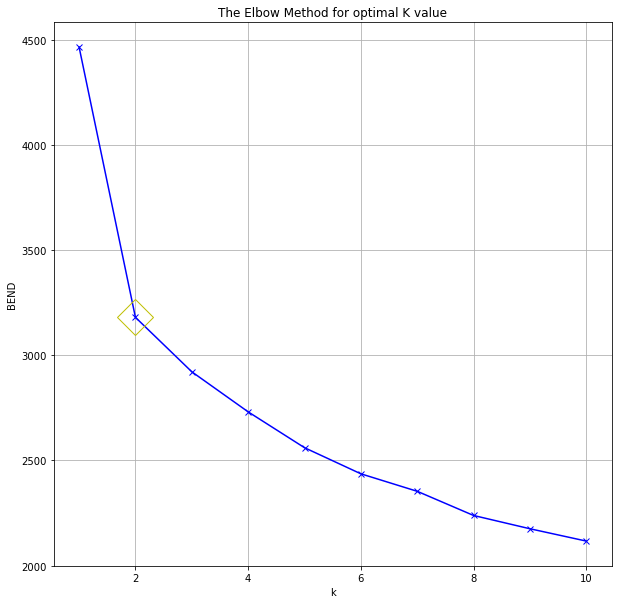

From the above graph, it is observed that there is noticeable decrese in sum of squared values at K=2, Therfore k = 2 will be an optimal value in this case.


In [25]:
#########################begin code for Task 1-a

SSE = []
kvr = range(1,11)


for k in kvr:
    Kmeans = KMeans(n_clusters=k).fit(X)
    clusters_labels_ = Kmeans.labels_
    SSE.append(Kmeans.inertia_)

for l in range(0,len(SSE)):
    print(str(l+1) + "\t" + str(SSE[l]))

#Plotted the eblow graph for K 1-10
plt.figure(figsize=(10,10))
plt.plot(kvr, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('BEND')
plt.title('The Elbow Method for optimal K value')

#Marked the best K value
plt.plot(2, SSE[1], marker='D', markersize=25 , markeredgecolor='y', markerfacecolor='None')
plt.grid('True')
plt.show()
    
print('As can be seen in the graph above, at K=2, the sum of squared values decreases noticeably. As a result, k = 2 will be an appropriate number in this scenario.')





### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [26]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing
# random state = 2022
### Important!!!


#Splitting the dataset as training 70% and testing 30%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3, random_state=2022)


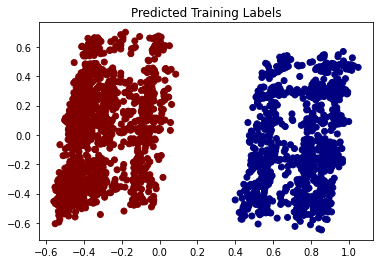

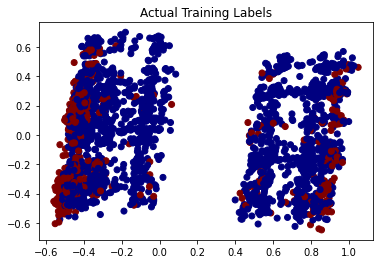

In [29]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels
#Cluster=2
# Import PCA
from sklearn.decomposition import PCA


# Created the KMeans model
Kmeans = KMeans(n_clusters = 2, random_state = 0)
# For each sample, compute cluster centers and forecast cluster index.
c2 = Kmeans.fit_predict(X_train)
# Model and fit the data to the PCA model
X_train_pca = PCA(n_components = 2).fit_transform(X_train)


# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
plt.title("Predicted Training Labels")
plt.scatter(x,y,c=c2,cmap='jet')
plt.show()
plt.title("Actual Training Labels")
plt.scatter(x,y,c=Y_train,cmap='jet')
plt.show()





Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

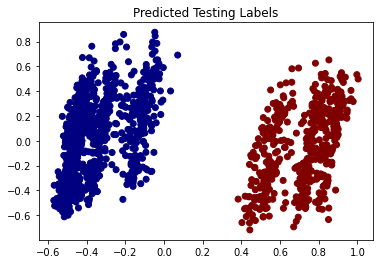

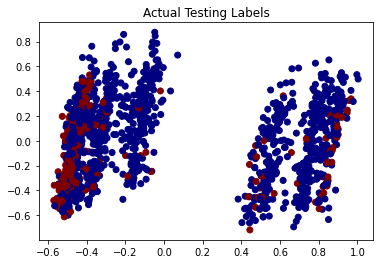

In [30]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels

#Cluster=2
# predict cluster index for each sample 
c2test = Kmeans.fit_predict(X_test)
# Model and fit the data to the PCA model
X_test_pca = PCA(n_components = 2).fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

plt.title("Predicted Testing Labels")
plt.scatter(x,y,c=c2test,cmap='jet')
plt.show()
plt.title("Actual Testing Labels")
plt.scatter(x,y,c=Y_test,cmap='jet')
plt.show()




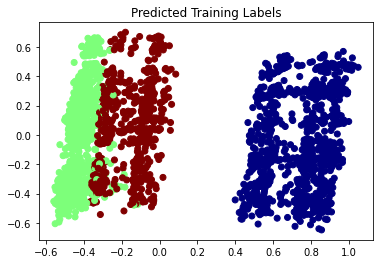

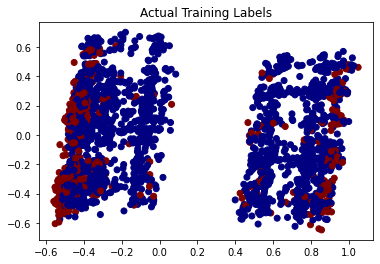

In [31]:
###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels
#Cluster=3
# Import PCA
from sklearn.decomposition import PCA


# Created the KMeans model
Kmeans = KMeans(n_clusters = 3, random_state = 0).fit(X_train)

# Computed cluster centers and predict cluster index for each sample 
c3 = Kmeans.fit_predict(X_train)
# Model and fit the data to the PCA model
X_train_pca = PCA(n_components = 2).fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
plt.title("Predicted Training Labels")
plt.scatter(x,y,c=c3,cmap='jet')
plt.show()
plt.title("Actual Training Labels")
plt.scatter(x,y,c=Y_train,cmap='jet')
plt.show()






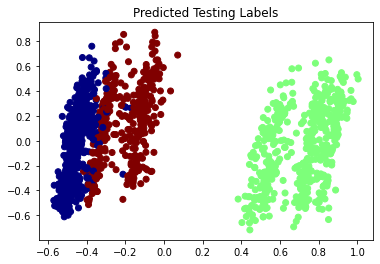

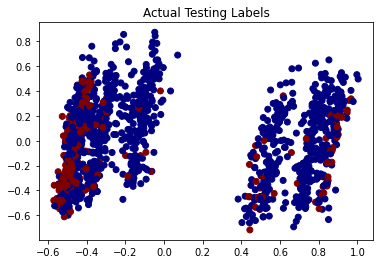

In [32]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels
#Cluster=3
# Computed cluster centers and predict cluster index for each sample 
c3test = Kmeans.fit_predict(X_test)
# Model and fit the data to the PCA model
X_test_pca = PCA(n_components = 2).fit_transform(X_test)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]
plt.title("Predicted Testing Labels")
plt.scatter(x,y,c=c3test,cmap='jet')
plt.show()
plt.title("Actual Testing Labels")
plt.scatter(x,y,c=Y_test,cmap='jet')
plt.show()



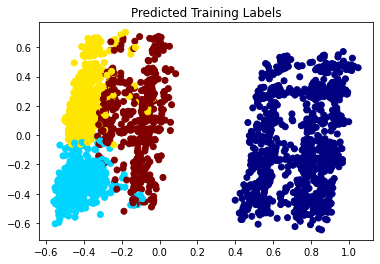

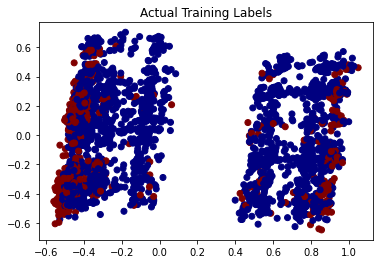

In [34]:
###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels
#cluster=4
# Import PCA
from sklearn.decomposition import PCA


# Created the KMeans model
Kmeans = KMeans(n_clusters = 4, random_state = 0)

# Computed cluster centers and predict cluster index for each sample 
c4 = Kmeans.fit_predict(X_train)
# Model and fit the data to the PCA model
X_train_pca = PCA(n_components = 2).fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
plt.title("Predicted Training Labels")
plt.scatter(x,y,c=c4,cmap='jet')
plt.show()
plt.title("Actual Training Labels")
plt.scatter(x,y,c=Y_train,cmap='jet')
plt.show()






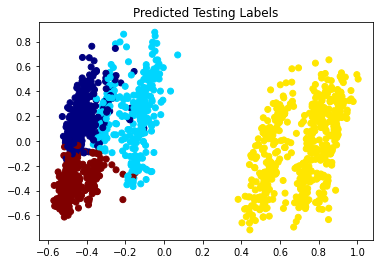

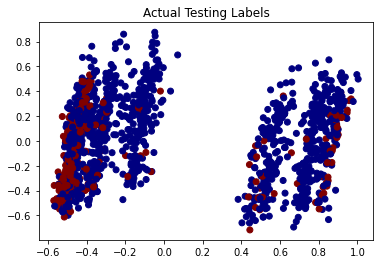

In [35]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels
#Cluster=4
# Compute cluster centers and predict cluster index for each sample 
c4test = Kmeans.fit_predict(X_test)
# Model and fit the data to the PCA model
X_test_pca = PCA(n_components = 2).fit_transform(X_test)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]
plt.title("Predicted Testing Labels")
plt.scatter(x,y,c=c4test,cmap='jet')
plt.show()
plt.title("Actual Testing Labels")
plt.scatter(x,y,c=Y_test,cmap='jet')
plt.show()



In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [36]:
###################begin code for Task 1-b-4: Print out a confusion matrix

print("Confusion matrix for training data for K =2 \n",confusion_matrix(Y_train,c2))
print("\nConfusion matrix for testing data for K=2 \n",confusion_matrix(Y_test,c2test))

print("Confusion matrix for training data for K=3 \n",confusion_matrix(Y_train,c3))
print("\nConfusion matrix for testing data for K=3 \n",confusion_matrix(Y_test,c3test))

print("Confusion matrix for training data for K=4 \n",confusion_matrix(Y_train,c4))
print("\nConfusion matrix for testing data for K=4 \n",confusion_matrix(Y_test,c4test))



Confusion matrix for training data for K =2 
 [[ 980 1652]
 [ 141  727]]

Confusion matrix for testing data for K=2 
 [[694 453]
 [298  55]]
Confusion matrix for training data for K=3 
 [[980 945 707]
 [141 690  37]
 [  0   0   0]]

Confusion matrix for testing data for K=3 
 [[349 453 345]
 [279  55  19]
 [  0   0   0]]
Confusion matrix for training data for K=4 
 [[980 457 630 565]
 [141 334 372  21]
 [  0   0   0   0]
 [  0   0   0   0]]

Confusion matrix for testing data for K=4 
 [[252 262 453 180]
 [148  12  55 138]
 [  0   0   0   0]
 [  0   0   0   0]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [42]:
###################begin code for Task 2-a: Print out a confusion matrix
# Imported AgglomerativeClustering
# Imported pds for calculating pairwise distance matrix
# Imported f1_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import f1_score


## Calculated pairwise distance matrix for X_train
dm = ['cosine','euclidean','manhattan']
pd=[]
pdm_train = X_train
for d in dm:
    pd.append(pairwise_distances(pdm_train,metric=d))

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
cplt_cosine =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="complete").fit_predict(pd[0])

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
cplt_euclidean =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="complete").fit_predict(pd[1])

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
cplt_manhattan =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="complete").fit_predict(pd[2])

## Model and fit the testing data to the AgglomerativeClustering model
## average linkage + cosine
avg_cosine =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="average").fit_predict(pd[0])

## Model and fit the testing data to the AgglomerativeClustering model
## average linkage + euclidean
avg_euclidean =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="average").fit_predict(pd[1])

## Model and fit the testing data to the AgglomerativeClustering model
## average linkage + manhattan
avg_manhattan =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="average").fit_predict(pd[2])

## F1 Scores.
F1_cplt_cosine = f1_score(Y_train,cplt_cosine)
F1_cplt_euclidean = f1_score(Y_train,cplt_euclidean)
F1_cplt_manhattan = f1_score(Y_train,cplt_manhattan)
F1_avg_cosine = f1_score(Y_train,avg_cosine)
F1_avg_euclidean = f1_score(Y_train,avg_euclidean)
F1_avg_manhattan = f1_score(Y_train,avg_manhattan)

print("F1-score for complete linkage + cosine", F1_cplt_cosine)
print("F1-score for complete linkage + euclidean", F1_cplt_euclidean)
print("F1-score for complete linkage + manhattan", F1_cplt_manhattan)
print("F1-score for average linkage + cosine", F1_avg_cosine)
print("F1-score for average linkage + euclidean", F1_avg_euclidean)
print("F1-score for average linkage + manhattan", F1_avg_manhattan)



F1-score for complete linkage + cosine 0.447797967354481
F1-score for complete linkage + euclidean 0.1414758269720102
F1-score for complete linkage + manhattan 0.14177978883861236
F1-score for average linkage + cosine 0.0
F1-score for average linkage + euclidean 0.447797967354481
F1-score for average linkage + manhattan 0.00449438202247191


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

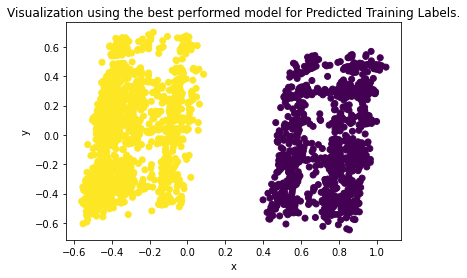

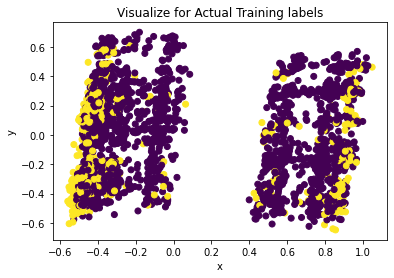

In [40]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels

linkages = {'complete_cosine':F1_cplt_cosine,'complete_euclidean':F1_cplt_euclidean,
            'complete_manhattan':F1_cplt_manhattan,'average_cosine':F1_avg_cosine,
            'average_euclidean':F1_avg_euclidean,'average_manhattan':F1_avg_manhattan}

# Maximum value of F1 score
bl = max(linkages,key=linkages.get)

# we found which F1 score that maximum values belongs to

if bl == 'complete_cosine':
    bpm = cplt_cosine

elif bl == 'complete_euclidean':
     bpm = cplt_euclidean

elif bl == 'complete_manhattan':
    bpm = cplt_manhattan

elif bl == 'average_cosine':
     bpm = avg_cosine

elif bl == 'average_euclidean':
    bpm = avg_euclidean
    
elif bl == 'average_manhattan':
    bpm = avg_manhattan

else:
    best_model = None

#  Finding PCA for x_train samples 
X_train_pca = PCA(n_components=2).fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:,0]
y = X_train_pca[:,1]

# plotting predicted training labels.
plt.scatter(x,y,c=bpm)
plt.title("Visualization using the best performed model for Predicted Training Labels.")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# plotting actual training labels.
plt.scatter(x,y,c=Y_train)
plt.title("Visualize for Actual Training labels")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

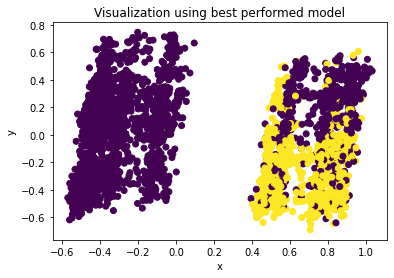

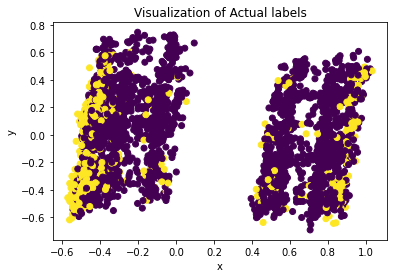

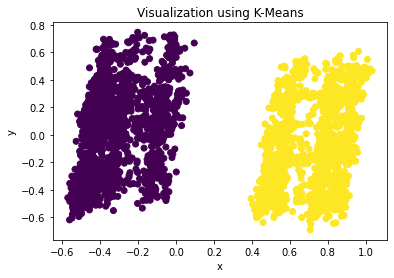

In [44]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
Kmeans = KMeans(n_clusters = 2, random_state = 0)
c = Kmeans.fit_predict(X)
### Agglomerative Clustering
# Calculated pairwise distance matrix for X
dm = ['cosine','euclidean','manhattan']
pd=[]
pdm_train = X
for d in dm:
    pd.append(pairwise_distances(pdm_train,metric=d))
    
# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
cplt_cosine =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="complete").fit_predict(pd[0])


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
cplt_euclidean =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="complete").fit_predict(pd[1])



## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
cplt_manhattan =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="complete").fit_predict(pd[2])


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine

avg_cosine =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="average").fit_predict(pd[0])

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
avg_euclidean =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="average").fit_predict(pd[1])


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
avg_manhattan =  AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage="average").fit_predict(pd[2])

### Visualize Clusters

linkages = {'complete_cosine':F1_cplt_cosine,'complete_euclidean':F1_cplt_euclidean,
            'complete_manhattan':F1_cplt_manhattan,'average_cosine':F1_avg_cosine,
            'average_euclidean':F1_avg_euclidean,'average_manhattan':F1_avg_manhattan}

# Maximum value of F1 score
bl = max(linkages,key=linkages.get)

# then we found which F1 score that maximum values belongs to


  
if bl == 'complete_cosine':
    bpm = cplt_cosine

elif bl == 'complete_euclidean':
     bpm = cplt_euclidean

elif bl == 'complete_manhattan':
    bpm = cplt_manhattan

elif bl == 'average_cosine':
     bpm = average_cosine

elif bl == 'average_euclidean':
    bpm = avg_euclidean
    

elif bl == 'average_manhattan':
    bpm = avg_manhattan

else:
    best_model = None


#  Model and fit the data to the PCA model
X_pca = PCA(n_components=2).fit_transform(X)

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
x = X_pca[:,0]
y = X_pca[:,1]

# plotting predicted training labels.
plt.scatter(x,y,c=bpm)
plt.title("Visualization using best performed model")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# plotting PCA using whole actual labels
x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x,y,c=Y)
plt.title("Visualization of Actual labels")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
x = X_pca[:,0]
y = X_pca[:,1]

# plotting KMeans using using the best model
plt.scatter(x,y,c=c)
plt.title("Visualization using K-Means")
plt.xlabel('x')
plt.ylabel('y')
plt.show()



## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [49]:
###################begin code for Task 3-b

print("Confusion matrix")
cm_KMeans = confusion_matrix(Y,c)
cm_Agg = confusion_matrix(Y,bpm)
print("Kmeans:", cm_KMeans)
print("\nAgglomerative:", cm_Agg)

print("\nPrecision")
p_KMeans = precision_score(Y,c)
p_Agg = precision_score(Y,bpm)
print("Kmeans: ", p_KMeans)
print("\nAgglomerative: ", p_Agg)


print("\nRecall")
r_KMeans = recall_score(Y,c)
r_Agg = recall_score(Y,bpm)
print("Kmeans:", r_KMeans)
print("\nAgglomerative: ", r_Agg)


print("\nF1 Score")
F1s_KMeans = f1_score(Y, c)
F1s_Agg = f1_score(Y,bpm)
print("Kmeans: ",F1s_KMeans )
print("\nAgglomerative:", F1s_Agg )

print("\nBy comparing the F1 score, recall and precision it is observed that Agglomerative has high value compared to K-means. Therfore agglomerative gives the best clustering of given data.")






Confusion matrix
Kmeans: [[2346 1433]
 [1025  196]]

Agglomerative: [[3010  769]
 [1130   91]]

Precision
Kmeans:  0.12031921424186617

Agglomerative:  0.1058139534883721

Recall
Kmeans: 0.16052416052416052

Agglomerative:  0.07452907452907453

F1 Score
Kmeans:  0.1375438596491228

Agglomerative: 0.08745795290725614

By comparing the F1 score, recall and precision it is observed that Agglomerative has high value compared to K-means. Therfore agglomerative gives the best clustering of given data.


## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[35 points] Task 1:</b>  

    [10 points] Task 1-a: Determine “k” value from the elbow method

    [25 points] Task 1-b: Visualization for K-Means Clustering

        [02 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [03 points] Task 1-b-4: Print out a confusion matrix
    


<b>[45 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [10 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[15 points] Report :</b> 
Make a 1 min video explaining the assignment and it's implementation.
    


 <b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points